In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image

from gensim.test.utils import common_texts
from gensim.corpora.dictionary import Dictionary
from gensim import corpora, models, similarities
from gensim.models import CoherenceModel

from gensim.test.utils import datapath
from collections import Counter

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
data=pd.read_csv('all_data.csv')

### Identify most common words

In [ ]:
wordCounts = Counter(' '.join(data['text']).split(' '))

In [ ]:
commonStopWords = list(list(zip(*wordCounts.most_common(15)))[0])
commonStopWords.extend(['afghanistan','pet','petdeals','want','products','shop','lovers'])
commonStopWords=set(commonStopWords)

In [ ]:
def getTopicDist(df,lda, cdict, ntopics, mapping):
  tdict = {i:0 for i in range(ntopics)}
  total = df.shape[0]
  for _,row in df.iterrows():
    text=row['text'].split(' ')
    bow = cdict.doc2bow(text)
    output = list(zip(*lda[bow][0]))
    indices = output[0]
    probs = output[1]
    topic = indices[np.argmax(probs)]
    tdict[topic] += 1/total
  print(tdict)
  for topic in mapping.keys():
    print(topic, sum([tdict[i] for i in mapping[topic]])*100)

### Opinion - Support

In [ ]:
alltexts1 = list(data[data.opinion=='Support']['text'])
alltexts1 = [[w for w in t.split(' ') if w not in commonStopWords] for t in alltexts1]

In [ ]:
common_dictionary1 = Dictionary(alltexts1)

In [ ]:
common_corpus1 = [common_dictionary1.doc2bow(text) for text in alltexts1]

In [ ]:
lda1 = models.LdaMulticore(common_corpus1, id2word=common_dictionary1, num_topics=10, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [ ]:
lda1.print_topics()

[(0,
  '0.061*"prochoice" + 0.027*"need" + 0.016*"know" + 0.016*"men" + 0.012*"fetus" + 0.012*"say" + 0.012*"since" + 0.011*"day" + 0.010*"time" + 0.010*"force"'),
 (1,
  '0.018*"mother" + 0.015*"abortions" + 0.013*"mothers" + 0.012*"womens" + 0.012*"wrong" + 0.012*"state" + 0.012*"living" + 0.011*"protect" + 0.011*"womb" + 0.011*"texasabortionban"'),
 (2,
  '0.044*"pro" + 0.025*"born" + 0.018*"anti" + 0.018*"arent" + 0.015*"actually" + 0.013*"kids" + 0.012*"also" + 0.011*"foster" + 0.010*"made" + 0.010*"read"'),
 (3,
  '0.018*"care" + 0.017*"support" + 0.016*"much" + 0.015*"point" + 0.014*"health" + 0.013*"getting" + 0.013*"conservatives" + 0.012*"make" + 0.012*"saying" + 0.011*"love"'),
 (4,
  '0.027*"choice" + 0.024*"murder" + 0.023*"body" + 0.015*"cant" + 0.014*"texastaliban" + 0.013*"make" + 0.012*"covid" + 0.012*"never" + 0.012*"means" + 0.011*"even"'),
 (5,
  '0.017*"de" + 0.015*"la" + 0.013*"catholic" + 0.011*"que" + 0.009*"innocent" + 0.009*"comes" + 0.008*"hard" + 0.008*"texa

In [ ]:
mapping1={'choice':[0,4], 'unborn':[9,7], 'religion':[5], 'healthcare':[3,8]}

In [ ]:
coherence_model_lda = CoherenceModel(model=lda1, texts=alltexts1, dictionary=common_dictionary1, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.3069020732512187


In [ ]:
df=data[data.opinion=='Support']
getTopicDist(df,lda1, common_dictionary1, 10,mapping1)

{0: 0.10139963634826463, 1: 0.12351473635249628, 2: 0.07996109772083547, 3: 0.0818639265930925, 4: 0.09687513214089792, 5: 0.04993868662522668, 6: 0.1538754281364989, 7: 0.14799780117552913, 8: 0.08110279504418968, 9: 0.08347075986299843}
choice 19.827476848916252
unborn 23.146856103852755
religion 4.993868662522668
healthcare 16.296672163728218


Opinion - Against

In [ ]:
alltexts2 = list(data[data.opinion=='Against']['text'])
alltexts2 = [[w for w in t.split(' ') if w not in commonStopWords] for t in alltexts2]

In [ ]:
common_dictionary2 = Dictionary(alltexts2)

In [ ]:
common_corpus2 = [common_dictionary2.doc2bow(text) for text in alltexts2]

In [ ]:
lda2 = models.LdaMulticore(common_corpus2, id2word=common_dictionary2, num_topics=10, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [ ]:
lda2.print_topics()

[(0,
  '0.033*"maga" + 0.027*"weight" + 0.026*"kag" + 0.026*"veterans" + 0.025*"nationalist" + 0.025*"covfefe" + 0.020*"republicans" + 0.019*"never" + 0.019*"bluelivesmatter" + 0.017*"patriot"'),
 (1,
  '0.037*"children" + 0.024*"healthcare" + 0.020*"matter" + 0.020*"care" + 0.019*"loss" + 0.017*"trump" + 0.013*"world" + 0.013*"health" + 0.013*"choice" + 0.012*"way"'),
 (2,
  '0.029*"products" + 0.021*"conservative" + 0.016*"take" + 0.015*"conservatives" + 0.014*"things" + 0.012*"today" + 0.012*"chance" + 0.012*"already" + 0.012*"care" + 0.010*"best"'),
 (3,
  '0.014*"probirth" + 0.012*"lives" + 0.011*"truly" + 0.011*"saving" + 0.011*"always" + 0.010*"old" + 0.010*"incestuous" + 0.010*"young" + 0.009*"evil" + 0.009*"point"'),
 (4,
  '0.029*"god" + 0.027*"prochoice" + 0.023*"help" + 0.018*"sure" + 0.017*"pro" + 0.017*"youre" + 0.017*"well" + 0.013*"make" + 0.013*"lives" + 0.012*"think"'),
 (5,
  '0.036*"americafirst" + 0.032*"patriot" + 0.032*"shop" + 0.032*"lovers" + 0.032*"others" + 0

In [ ]:
mapping2={'nationalist':[0,5,2], 'unborn':[9,7], 'religion':[4], 'healthcare':[3,8]}

In [ ]:
coherence_model_lda = CoherenceModel(model=lda2, texts=alltexts2, dictionary=common_dictionary2, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.3875222136222376


In [ ]:
df=data[data.opinion=='Against']
getTopicDist(df,lda2, common_dictionary2, 10, mapping2)

{0: 0.0841531974701329, 1: 0.1040056219255086, 2: 0.07800421644413158, 3: 0.09276177090653476, 4: 0.19747013352073445, 5: 0.10347856640899421, 6: 0.07519325368938812, 7: 0.08345045678144704, 8: 0.08924806746310543, 9: 0.09223471539002036}
nationalist 26.56359803232587
unborn 17.56851721714674
religion 19.747013352073445
healthcare 18.200983836964017


###What are males talking about?

In [ ]:
males_1=data[(data.gender=='male') & (data.opinion=='Support')]
maletexts_1 = list(males_1['text'])
maletexts_1 = (' '.join(maletexts_1)).split(' ')

males_0=data[(data.gender=='male') & (data.opinion=='Against')]
maletexts_0 = list(males_0['text'])
maletexts_0 = (' '.join(maletexts_0)).split(' ')

In [ ]:
#lda1[common_dictionary1.doc2bow(maletexts_1)][0]
getTopicDist(males_1,lda1, common_dictionary1, 10, mapping1)

{0: 0.09733740724574287, 1: 0.12650953004510196, 2: 0.0859886512439972, 3: 0.08162374508947963, 4: 0.09624618070711348, 5: 0.05448857849556208, 6: 0.1522624763567556, 7: 0.13698530481594412, 8: 0.08889858868034224, 9: 0.07965953731994672}
choice 19.358358795285636
unborn 21.664484213589084
religion 5.448857849556208
healthcare 17.052233376982187


In [ ]:
getTopicDist(males_0,lda2, common_dictionary2, 10, mapping2)

{0: 0.10409993593850159, 1: 0.08520179372197355, 2: 0.08231902626521503, 3: 0.07270980140935332, 4: 0.17584881486226686, 5: 0.13452914798206328, 6: 0.07046764894298559, 7: 0.0935297885970537, 8: 0.10057655349135229, 9: 0.08071748878923808}
nationalist 32.09481101857799
unborn 17.42472773862918
religion 17.584881486226685
healthcare 17.32863549007056


### What are females talking about?

In [ ]:
females_1=data[(data.gender=='female') & (data.opinion=='Support')]
femaletexts_1 = list(females_1['text'])
femaletexts_1 = (' '.join(femaletexts_1)).split(' ')

females_0=data[(data.gender=='female') & (data.opinion=='Against')]
femaletexts_0 = list(females_0['text'])
femaletexts_0 = (' '.join(femaletexts_0)).split(' ')

In [ ]:
getTopicDist(females_1,lda1, common_dictionary1, 10, mapping1)

{0: 0.10744218923558653, 1: 0.11945874987377722, 2: 0.07230132283146586, 3: 0.08219731394526995, 4: 0.09714228011713737, 5: 0.043926083005150024, 6: 0.1557103907906676, 7: 0.16277895587195526, 8: 0.07058467131172433, 9: 0.08845804301726846}
choice 20.45844693527239
unborn 25.123699888922374
religion 4.392608300515002
healthcare 15.278198525699427


In [ ]:
getTopicDist(females_0,lda2, common_dictionary2, 10, mapping2)

{0: 0.059922178988326705, 1: 0.12723735408560274, 2: 0.0727626459143967, 3: 0.11712062256809304, 4: 0.22334630350194482, 5: 0.06614785992217882, 6: 0.08132295719844336, 7: 0.07159533073929943, 8: 0.075486381322957, 9: 0.10505836575875456}
nationalist 19.883268482490223
unborn 17.6653696498054
religion 22.33463035019448
healthcare 19.260700389105004


### What are whites talking about?

In [ ]:
white_1=data[(data.race=='white') & (data.opinion=='Support')]
whitetexts_1 = list(white_1['text'])
whitetexts_1 = (' '.join(whitetexts_1)).split(' ')

white_0=data[(data.race=='white') & (data.opinion=='Against')]
whitetexts_0 = list(white_0['text'])
whitetexts_0 = (' '.join(whitetexts_0)).split(' ')

In [ ]:
getTopicDist(white_1,lda1, common_dictionary1, 10, mapping1)

{0: 0.09911117381490084, 1: 0.12281320541761162, 2: 0.07950056433408656, 3: 0.0794300225733642, 4: 0.09530191873589375, 5: 0.056151241534988176, 6: 0.1533577878103907, 7: 0.1453160270880424, 8: 0.08281602708803718, 9: 0.08620203160271014}
choice 19.44130925507946
unborn 23.151805869075254
religion 5.615124153498818
healthcare 16.224604966140138


In [ ]:
getTopicDist(white_0,lda2, common_dictionary2, 10, mapping2)

{0: 0.10641587219788615, 1: 0.09482092244266871, 2: 0.07137335738211789, 3: 0.09920123679463974, 4: 0.18113888173150963, 5: 0.1247101262561181, 6: 0.06802370523061063, 7: 0.07961865498582807, 8: 0.08709095593919042, 9: 0.0876062870394223}
nationalist 30.249935583612213
unborn 16.722494202525038
religion 18.113888173150965
healthcare 18.629219273383015


### What are non-whites talking about?

In [ ]:
nonwhite_1=data[(data.race!='white') & (data.opinion=='Support')]
nonwhitetexts_1 = list(nonwhite_1['text'])
nonwhitetexts_1 = (' '.join(nonwhitetexts_1)).split(' ')

nonwhite_0=data[(data.race!='white') & (data.opinion=='Against')]
nonwhitetexts_0 = list(nonwhite_0['text'])
nonwhitetexts_0 = (' '.join(nonwhitetexts_0)).split(' ')

In [ ]:
getTopicDist(nonwhite_1,lda1, common_dictionary1, 10, mapping1)

{0: 0.1046131109469011, 1: 0.12445898870473845, 2: 0.08065026918610811, 3: 0.08550617544600449, 4: 0.09901826243006397, 5: 0.040852950490869004, 6: 0.15454449488018726, 7: 0.1519054153911128, 8: 0.07875013195397475, 9: 0.07970020057004143}
choice 20.363137337696507
unborn 23.16056159611542
religion 4.0852950490869
healthcare 16.425630739997924


In [ ]:
getTopicDist(nonwhite_0,lda2, common_dictionary2, 10, mapping2)

{0: 0.036443953616786304, 1: 0.12424075096631651, 2: 0.09166206515737134, 3: 0.07896189950303678, 4: 0.23191606847046, 5: 0.05853119823302032, 6: 0.09110988404196549, 7: 0.09221424627277719, 8: 0.09387078961899474, 9: 0.1010491441192708}
nationalist 18.663721700717794
unborn 19.326339039204797
religion 23.191606847046
healthcare 17.283268912203155


### What are adults talking about?

In [ ]:
adult_1=data[(data.age=='>=40') & (data.opinion=='Support')]
adulttexts_1 = list(adult_1['text'])
adulttexts_1 = (' '.join(adulttexts_1)).split(' ')

adult_0=data[(data.age=='>=40') & (data.opinion=='Against')]
adulttexts_0 = list(adult_0['text'])
adulttexts_0 = (' '.join(adulttexts_0)).split(' ')

In [ ]:
getTopicDist(adult_1,lda1, common_dictionary1, 10, mapping1)

{0: 0.09696287964004614, 1: 0.1394825646794163, 2: 0.08132733408324005, 3: 0.0789651293588305, 4: 0.08492688413948318, 5: 0.05995500562429664, 6: 0.14465691788526516, 7: 0.1437570303712045, 8: 0.08953880764904469, 9: 0.08042744656917927}
choice 18.18897637795293
unborn 22.418447694038377
religion 5.9955005624296644
healthcare 16.85039370078752


In [ ]:
getTopicDist(adult_0,lda2, common_dictionary2, 10, mapping2)

{0: 0.13839285714285673, 1: 0.09040178571428546, 2: 0.07328869047619029, 3: 0.06882440476190459, 4: 0.1555059523809519, 5: 0.14285714285714243, 6: 0.0651041666666665, 7: 0.08221726190476168, 8: 0.1011904761904759, 9: 0.08221726190476168}
nationalist 35.453869047618944
unborn 16.443452380952337
religion 15.550595238095191
healthcare 17.00148809523805


### What are middle-aged talking about?

In [ ]:
ma_1=data[(~data.age.isin(['>=40','<=18'])) & (data.opinion=='Support')]
matexts_1 = list(ma_1['text'])
adulttexts_1 = (' '.join(matexts_1)).split(' ')

ma_0=data[(~data.age.isin(['>=40','<=18'])) & (data.opinion=='Against')]
matexts_0 = list(ma_0['text'])
matexts_0 = (' '.join(matexts_0)).split(' ')

In [ ]:
getTopicDist(ma_1,lda1, common_dictionary1, 10, mapping1)

{0: 0.10199423354156456, 1: 0.10896203748197744, 2: 0.08000961076405495, 3: 0.08553580009610655, 4: 0.10391638635271294, 5: 0.04517059106198955, 6: 0.16362325804901398, 7: 0.155694377703026, 8: 0.07352234502642917, 9: 0.08157135992311301}
choice 20.59106198942775
unborn 23.7265737626139
religion 4.517059106198955
healthcare 15.905814512253572


In [ ]:
getTopicDist(ma_0,lda2, common_dictionary2, 10, mapping2)

{0: 0.03265524625267668, 1: 0.11402569593147777, 2: 0.07815845824411133, 3: 0.12419700214132795, 4: 0.23126338329764567, 5: 0.08137044967880086, 6: 0.08511777301927198, 7: 0.08672376873661675, 8: 0.07226980728051385, 9: 0.09421841541755899}
nationalist 19.218415417558887
unborn 18.094218415417572
religion 23.126338329764568
healthcare 19.64668094218418


### What are kids talking about?

In [ ]:
kid_1=data[(data.age=='<=18') & (data.opinion=='Support')]
kidtexts_1 = list(kid_1['text'])
kidtexts_1 = (' '.join(kidtexts_1)).split(' ')

kid_0=data[(data.age=='<=18') & (data.opinion=='Against')]
kidtexts_0 = list(kid_0['text'])
kidtexts_0 = (' '.join(kidtexts_0)).split(' ')

In [ ]:
getTopicDist(kid_1,lda1, common_dictionary1, 10, mapping1)

{0: 0.10691530691530607, 1: 0.12074592074591951, 2: 0.07832167832167827, 3: 0.08127428127428114, 4: 0.10349650349650275, 5: 0.04242424242424248, 6: 0.1541569541569546, 7: 0.14374514374514355, 8: 0.07940947940947933, 9: 0.08951048951048915}
choice 21.04118104118088
unborn 23.32556332556327
religion 4.242424242424248
healthcare 16.068376068376047


In [ ]:
getTopicDist(kid_0,lda2, common_dictionary2, 10, mapping2)

{0: 0.04049295774647885, 1: 0.12147887323943649, 2: 0.08802816901408442, 3: 0.0977112676056337, 4: 0.2403169014084504, 5: 0.0475352112676056, 6: 0.0836267605633802, 7: 0.08186619718309851, 8: 0.08890845070422526, 9: 0.11003521126760551}
nationalist 17.605633802816886
unborn 19.190140845070403
religion 24.03169014084504
healthcare 18.661971830985895


## Sentiment

### Positive

In [ ]:
alltexts_pos = list(data[data.sentiment=='pos']['text'])
alltexts_pos = [[w for w in t.split(' ') if w not in commonStopWords] for t in alltexts_pos]

In [ ]:
common_dictionaryp = Dictionary(alltexts_pos)

In [ ]:
common_corpusp = [common_dictionaryp.doc2bow(text) for text in alltexts_pos]

In [ ]:
ldap = models.LdaMulticore(common_corpusp, id2word=common_dictionaryp, num_topics=10, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [ ]:
ldap.print_topics()

[(0,
  '0.025*"want" + 0.023*"care" + 0.019*"children" + 0.019*"pro" + 0.018*"choice" + 0.017*"really" + 0.016*"support" + 0.015*"thats" + 0.015*"child" + 0.013*"say"'),
 (1,
  '0.024*"texasabortionban" + 0.023*"shop" + 0.023*"products" + 0.022*"lovers" + 0.020*"texastaliban" + 0.020*"bluelivesmatterbest" + 0.019*"men" + 0.017*"states" + 0.014*"another" + 0.014*"via"'),
 (2,
  '0.055*"prochoice" + 0.026*"texasabortionlaw" + 0.021*"know" + 0.016*"youre" + 0.015*"abortionban" + 0.014*"well" + 0.014*"human" + 0.012*"movement" + 0.012*"rare" + 0.011*"masks"'),
 (3,
  '0.022*"unborn" + 0.017*"catholic" + 0.015*"good" + 0.013*"thing" + 0.013*"save" + 0.013*"babies" + 0.012*"got" + 0.012*"de" + 0.012*"sometimes" + 0.010*"biden"'),
 (4,
  '0.032*"take" + 0.023*"heartbeat" + 0.020*"babies" + 0.020*"god" + 0.017*"still" + 0.012*"care" + 0.012*"conception" + 0.011*"human" + 0.010*"begins" + 0.010*"thanks"'),
 (5,
  '0.028*"others" + 0.026*"im" + 0.019*"also" + 0.019*"everyone" + 0.018*"think" + 0

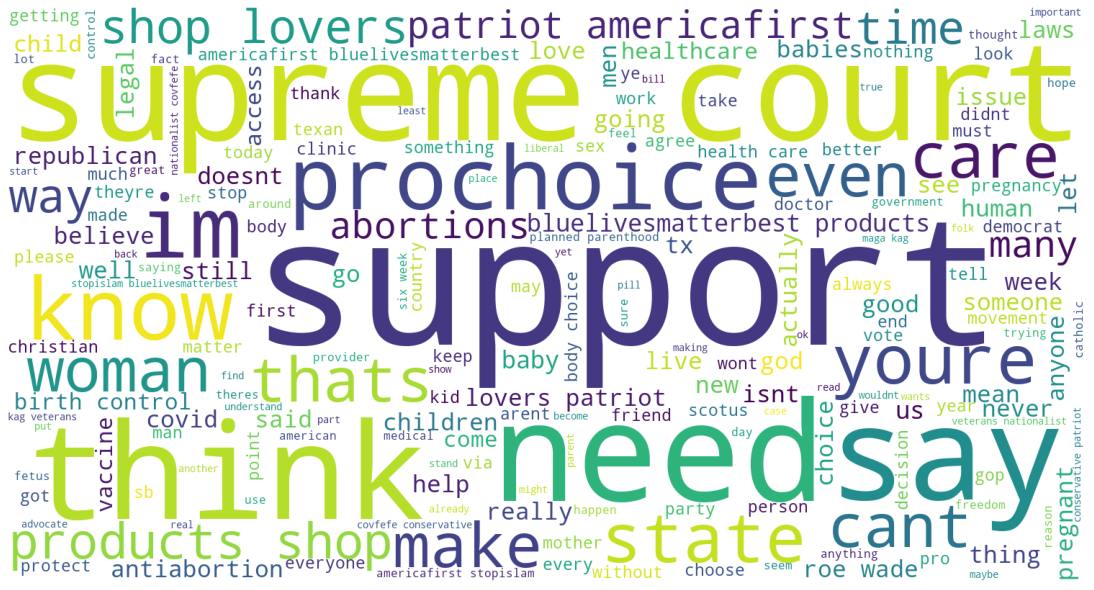

In [ ]:
stopwords = set(STOPWORDS)
text = ' '.join([w for w in ' '.join(data[data.sentiment=='pos']['text']).split(' ') if w not in commonStopWords])
wordcloud = WordCloud(width = 1500, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(text)

plt.figure(figsize = (15, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### Negative

In [ ]:
alltexts_neg = list(data[data.sentiment=='neg']['text'])
alltexts_neg = [[w for w in t.split(' ') if w not in commonStopWords] for t in alltexts_neg]

In [ ]:
common_dictionaryn = Dictionary(alltexts_neg)

In [ ]:
common_corpusn = [common_dictionaryn.doc2bow(text) for text in alltexts_neg]

In [ ]:
ldan = models.LdaMulticore(common_corpusn, id2word=common_dictionaryn, num_topics=10, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [ ]:
ldan.print_topics()

[(0,
  '0.025*"babies" + 0.023*"want" + 0.019*"religious" + 0.017*"really" + 0.016*"killed" + 0.012*"care" + 0.011*"rape" + 0.011*"kids" + 0.010*"rates" + 0.009*"back"'),
 (1,
  '0.017*"call" + 0.016*"state" + 0.015*"getting" + 0.014*"abortions" + 0.013*"autonomy" + 0.011*"today" + 0.010*"already" + 0.010*"illegal" + 0.009*"trump" + 0.009*"take"'),
 (2,
  '0.030*"anyone" + 0.022*"vote" + 0.020*"feel" + 0.014*"person" + 0.013*"look" + 0.013*"new" + 0.013*"lets" + 0.011*"sue" + 0.009*"website" + 0.008*"high"'),
 (3,
  '0.030*"covid" + 0.029*"weight" + 0.024*"murder" + 0.020*"never" + 0.020*"matter" + 0.020*"death" + 0.018*"mask" + 0.017*"killing" + 0.016*"babies" + 0.015*"maga"'),
 (4,
  '0.015*"someone" + 0.014*"shit" + 0.013*"risk" + 0.012*"die" + 0.012*"take" + 0.012*"stupid" + 0.012*"see" + 0.012*"heartbeat" + 0.011*"around" + 0.011*"fight"'),
 (5,
  '0.030*"loss" + 0.029*"prochoice" + 0.019*"need" + 0.016*"movement" + 0.016*"bad" + 0.013*"conservatives" + 0.013*"make" + 0.011*"theyr

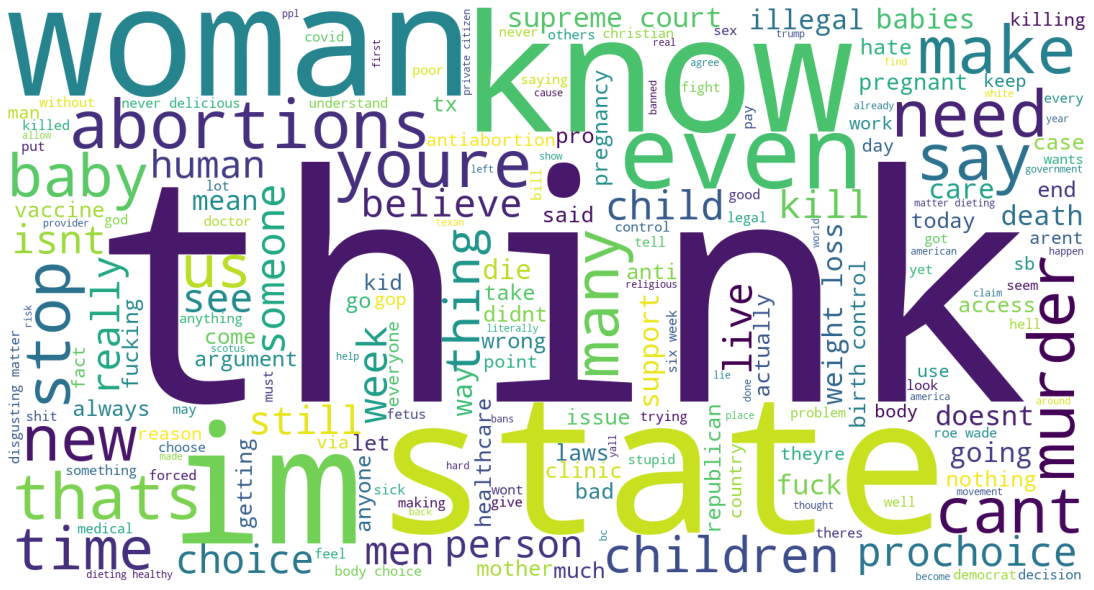

In [ ]:
stopwords = set(STOPWORDS)
text = ' '.join([w for w in ' '.join(data[data.sentiment=='neg']['text']).split(' ') if w not in commonStopWords])
wordcloud = WordCloud(width = 1500, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(text)

plt.figure(figsize = (15, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

## Global LDA + Sentiment

In [ ]:
alltexts = list(data['text'])
alltexts = [[w for w in t.split(' ') if w not in commonStopWords] for t in alltexts]

common_dictionary = Dictionary(alltexts)

common_corpus = [common_dictionary.doc2bow(text) for text in alltexts]

lda = models.LdaMulticore(common_corpus, id2word=common_dictionary, num_topics=10, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

lda.print_topics()

[(0,
  '0.026*"choice" + 0.021*"body" + 0.019*"see" + 0.019*"cant" + 0.015*"covid" + 0.014*"always" + 0.013*"way" + 0.012*"never" + 0.012*"know" + 0.011*"still"'),
 (1,
  '0.061*"prochoice" + 0.026*"killing" + 0.019*"abortionban" + 0.017*"movement" + 0.017*"texastaliban" + 0.014*"nothing" + 0.010*"call" + 0.010*"says" + 0.010*"republicans" + 0.010*"every"'),
 (2,
  '0.026*"youre" + 0.020*"child" + 0.016*"also" + 0.015*"doesnt" + 0.015*"men" + 0.014*"think" + 0.014*"many" + 0.013*"woman" + 0.013*"support" + 0.012*"human"'),
 (3,
  '0.031*"babies" + 0.021*"birth" + 0.020*"unborn" + 0.016*"baby" + 0.016*"children" + 0.015*"take" + 0.015*"die" + 0.015*"abortions" + 0.014*"murder" + 0.013*"well"'),
 (4,
  '0.026*"make" + 0.016*"gop" + 0.016*"actually" + 0.014*"catholic" + 0.014*"biden" + 0.013*"free" + 0.012*"tell" + 0.012*"force" + 0.011*"etc" + 0.009*"say"'),
 (5,
  '0.018*"bible" + 0.016*"de" + 0.015*"la" + 0.010*"family" + 0.010*"que" + 0.009*"save" + 0.008*"term" + 0.008*"old" + 0.008*

In [ ]:
mapping={'choice':[0], 'unborn':[3], 'religion':[5,7], 'healthcare':[9], 'hate':[1]}

In [ ]:
# Get dominant topic
dominantTopics = []

for _,row in data.iterrows():
    text=row['text'].split(' ')
    bow = common_dictionary.doc2bow(text)
    output = list(zip(*lda[bow][0]))
    indices = output[0]
    probs = output[1]
    topicNames = ['choice','unborn','religion','healthcare','hate speech']
    maxTopicId = indices[np.argmax(probs)]
    if maxTopicId==0:
      dominantTopics.append('choice')
    elif maxTopicId==3:
      dominantTopics.append('unborn')
    elif maxTopicId in [5,7]:
      dominantTopics.append('religion')
    elif maxTopicId==9:
      dominantTopics.append('healthcare')
    elif maxTopicId==1:
      dominantTopics.append('hate speech')
    else:
      dominantTopics.append('other')

In [ ]:
data['dominantTopic']=dominantTopics

In [ ]:
mask = np.array(Image.open("4852757-middle.png"))
texas = np.array(Image.open("texas.jpg"))

### Covid

1154


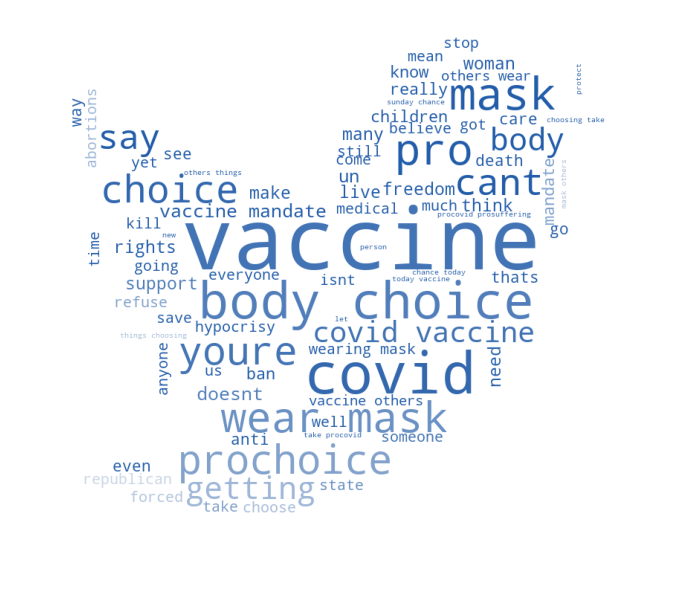

In [ ]:
coviddata = data[data.text.str.contains('vaccin')]
print(coviddata.shape[0])

colors = ImageColorGenerator(mask)

stopwords = set(STOPWORDS)
text = ' '.join([w for w in ' '.join(coviddata['text']).split(' ') if w not in commonStopWords])
text = text.replace('vaccinated','').replace('vaccination','')
wordcloud = WordCloud(width = 1500, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10, 
                mask=mask,
                color_func=colors,
                max_words=200).generate(text)

plt.figure(figsize = (15, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### Texas Taliban

1099


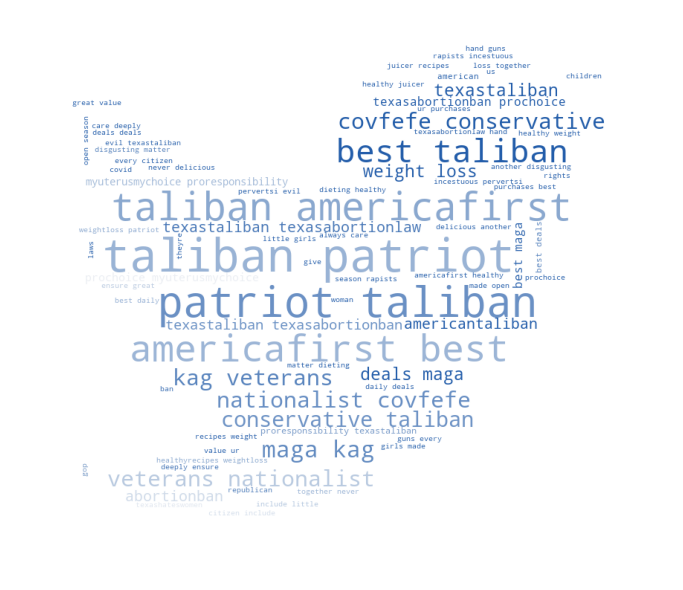

In [ ]:
ttdata = data[data.text.str.contains('taliban')]
print(ttdata.shape[0])

colors = ImageColorGenerator(mask)

stopwords = set(STOPWORDS)
text = ' '.join([w for w in ' '.join(ttdata['text']).split(' ') if w not in commonStopWords])

wordcloud = WordCloud(width = 1500, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10, 
                mask=mask,
                color_func=colors,
                max_words=200).generate(text)

plt.figure(figsize = (15, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### God

1434


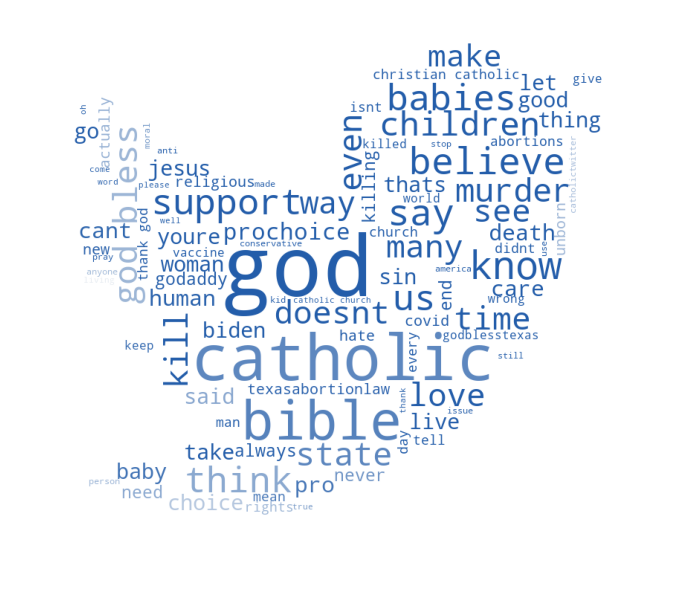

In [ ]:
ttdata = data[data.text.str.contains('god') | data.text.str.contains('bible') | data.text.str.contains('catholic')]
print(ttdata.shape[0])

colors = ImageColorGenerator(mask)

stopwords = set(STOPWORDS)
text = ' '.join([w for w in ' '.join(ttdata['text']).split(' ') if w not in commonStopWords])

wordcloud = WordCloud(width = 1500, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10, 
                mask=mask,
                color_func=colors,
                max_words=200).generate(text)

plt.figure(figsize = (15, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### Republican

1531


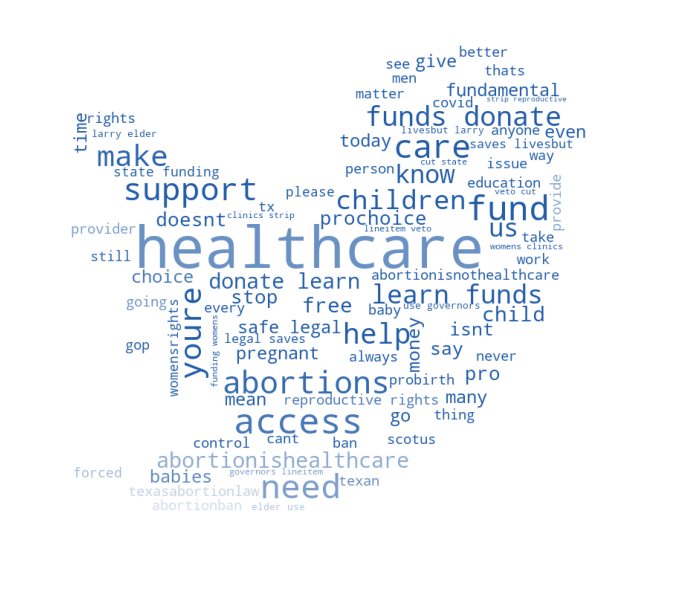

In [ ]:
ttdata = data[data.text.str.contains('healthcare') | data.text.str.contains('fund') | data.text.str.contains('donate')]
print(ttdata.shape[0])

colors = ImageColorGenerator(mask)

stopwords = set(STOPWORDS)
text = ' '.join([w for w in ' '.join(ttdata['text']).split(' ') if w not in commonStopWords])
text = text.replace('human','').replace('woman','').replace('think','')

wordcloud = WordCloud(width = 1500, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10, 
                mask=mask,
                color_func=colors).generate(text)

plt.figure(figsize = (15, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

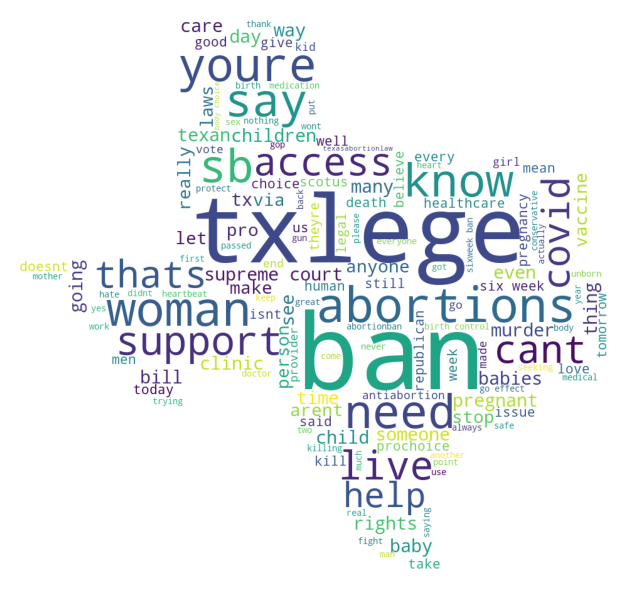

In [ ]:
texans = data[(~data.description.isna()
 & (data.description.str.lower().str.contains('texas')
 | data.description.str.lower().str.contains('tx'))) | (data.texas==1)]

colors = ImageColorGenerator(mask)

stopwords = set(STOPWORDS)
text = ' '.join([w for w in ' '.join(texans['text']).split(' ') if w not in commonStopWords])
text = text.replace('state','').replace('think','').replace('new',' ')

wordcloud = WordCloud(width = 1500, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10, 
                mask=texas).generate(text)

plt.figure(figsize = (15, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [ ]:
texans.to_csv('texans.csv',index=False)